In [1]:
import pandas as pd
import numpy as np
import matplotlib
from bokeh.io import output_notebook

In [2]:
# Import data into pandas data frames
air_reserve_df = pd.read_csv(r'./data/air_reserve.csv', parse_dates=['visit_datetime', 'reserve_datetime'])
air_store_info_df = pd.read_csv(r'./data/air_store_info.csv')
air_visit_data_df = pd.read_csv(r'./data/air_visit_data.csv', parse_dates=['visit_date'])
date_info_df = pd.read_csv(r'./data/date_info.csv', parse_dates=['calendar_date'])
date_info_df['calendar_date'] = date_info_df['calendar_date'].dt.date
# hpg_reserve_df = pd.read_csv(r'./data/hpg_reserve.csv')
hpg_store_info_df = pd.read_csv(r'./data/hpg_store_info.csv')
store_id_relation_df = pd.read_csv(r'./data/store_id_relation.csv')

In [3]:
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
air_reserve_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
air_reserve_df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [6]:
air_store_info_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [7]:
air_store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [8]:
air_store_info_df.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


In [9]:
air_visit_data_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [10]:
air_visit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [11]:
air_visit_data_df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [12]:
date_info_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [13]:
date_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
calendar_date    517 non-null object
day_of_week      517 non-null object
holiday_flg      517 non-null int64
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [14]:
date_info_df.describe()

,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
air_reserve_complete_df = air_reserve_df.join(air_store_info_df.set_index('air_store_id'), on='air_store_id')
air_reserve_complete_df['visit_date'] = air_reserve_complete_df['visit_datetime'].dt.date
air_reserve_complete_df = pd.merge(air_reserve_complete_df, date_info_df, how='left', left_on='visit_date', right_on='calendar_date')
air_reserve_complete_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visit_date,calendar_date,day_of_week,holiday_flg
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,2016-01-01,Friday,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,2016-01-01,2016-01-01,Friday,1
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,2016-01-01,2016-01-01,Friday,1
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,2016-01-01,Friday,1
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,2016-01-01,2016-01-01,Friday,1


In [16]:
air_reserve_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92378 entries, 0 to 92377
Data columns (total 12 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
air_genre_name      92378 non-null object
air_area_name       92378 non-null object
latitude            92378 non-null float64
longitude           92378 non-null float64
visit_date          92378 non-null object
calendar_date       92378 non-null object
day_of_week         92378 non-null object
holiday_flg         92378 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 9.2+ MB


In [17]:
air_reserve_complete_df.describe()

,reserve_visitors,latitude,longitude,holiday_flg
count,92378.000000,92378.000000,92378.000000,92378.000000
mean,4.481749,36.296511,137.258264,0.066228
std,4.919669,2.994006,3.802518,0.248681
min,1.000000,33.211967,130.348436,0.000000
25%,2.000000,34.681261,134.841177,0.000000
50%,3.000000,35.641463,139.036327,0.000000
75%,5.000000,35.694003,139.770825,0.000000
max,100.000000,44.020632,144.273398,1.000000


In [18]:
output_notebook()

Loading BokehJS ...

In [19]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show

In [20]:
p1 = figure(title="Air Reservation Visitors Distribution", tools="save",
            background_fill_color="#9D9D9C")

measured = air_reserve_complete_df['reserve_visitors']
hist, edges = np.histogram(measured, density=True, bins='fd')

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'Number of visitors'
p1.yaxis.axis_label = 'Frequency'

df = air_reserve_complete_df[['reserve_visitors', 'holiday_flg']]
df['holiday_flg'] = df['holiday_flg'].astype('category')

cats = [0, 1]

# find the quartiles and IQR for each category
groups = air_reserve_complete_df[['reserve_visitors', 'holiday_flg']].groupby('holiday_flg')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.reserve_visitors > upper.loc[cat]['reserve_visitors']) | (group.reserve_visitors < lower.loc[cat]['reserve_visitors'])]['reserve_visitors']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)

p2 = figure(tools="save", background_fill_color="#EFE8E2", title="", x_range=cats)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.reserve_visitors = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'reserve_visitors']),upper.reserve_visitors)]
lower.reserve_visitors = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'reserve_visitors']),lower.reserve_visitors)]

# stems
p2.segment(cats, upper.reserve_visitors, cats, q3.reserve_visitors, line_color="black")
p2.segment(cats, lower.reserve_visitors, cats, q1.reserve_visitors, line_color="black")

# boxes
p2.vbar(cats, 0.7, q2.reserve_visitors, q3.reserve_visitors, fill_color="#E08E79", line_color="black")
p2.vbar(cats, 0.7, q1.reserve_visitors, q2.reserve_visitors, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p2.rect(cats, lower.reserve_visitors, 0.2, 0.01, line_color="black")
p2.rect(cats, upper.reserve_visitors, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p2.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = "white"
p2.grid.grid_line_width = 2
p2.xaxis.major_label_text_font_size="12pt"

show(gridplot(p1,p2, ncols=2, plot_width=250, plot_height=250, toolbar_location=None))

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


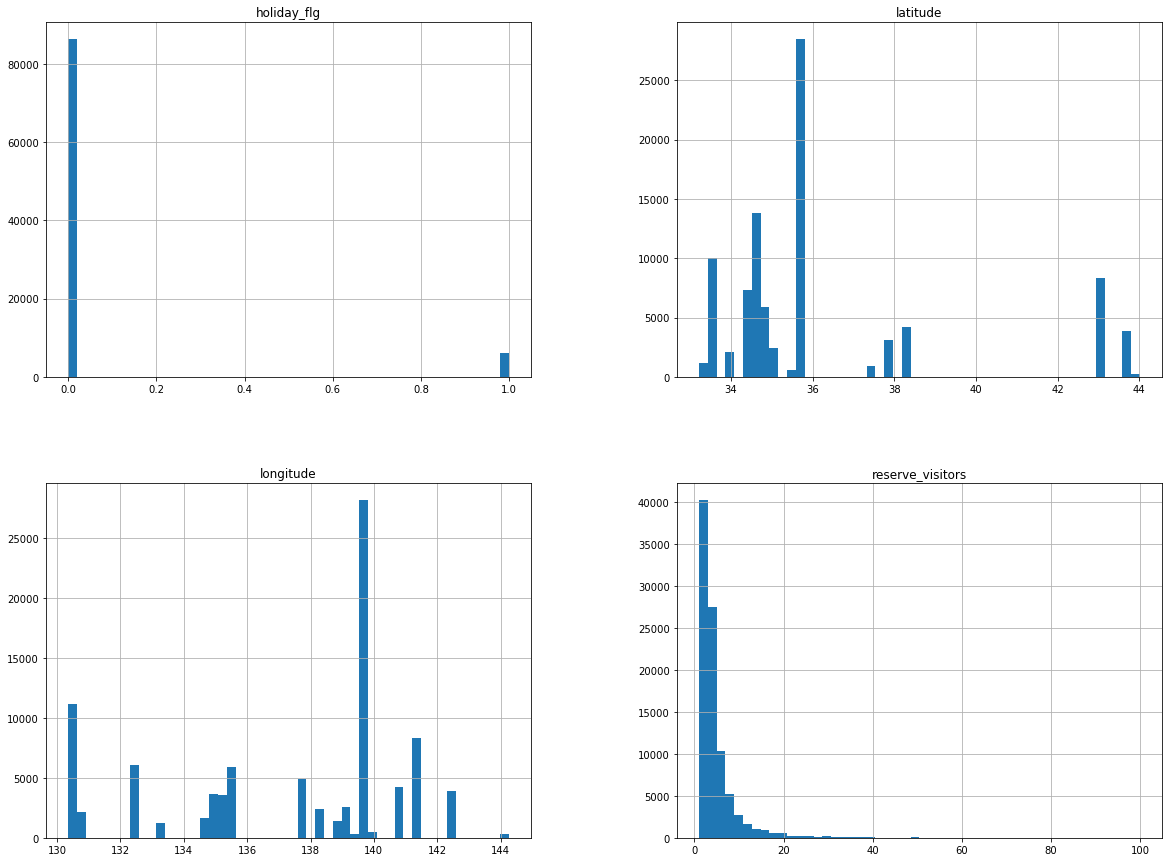

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
air_reserve_complete_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# 80/20 train & test split
air_reservations_indexed = air_reserve_complete_df.reset_index()
train_set, test_set = train_test_split(air_reservations_indexed, test_size=0.2, random_state=123)
print(len(train_set), "train records \n", len(test_set), "test records")

73902 train records 
 18476 test records


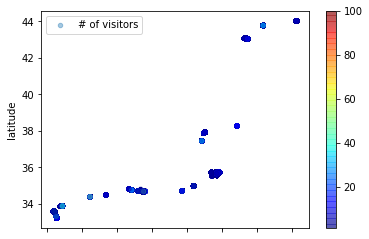

In [28]:
air_reservations_indexed.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4, s=air_reservations_indexed["reserve_visitors"], 
                              label="# of visitors", c=air_reservations_indexed["reserve_visitors"], 
                              cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [36]:
ts = pd.DataFrame(air_reservations_indexed['reserve_visitors'])
ts = ts.set_index(air_reservations_indexed['visit_datetime'])

In [37]:

ts.head()

,reserve_visitors
visit_datetime,
2016-01-01 19:00:00,1
2016-01-01 19:00:00,3
2016-01-01 19:00:00,6
2016-01-01 20:00:00,2
2016-01-01 20:00:00,5


In [54]:
ts_dates = air_reservations_indexed['visit_datetime'].as_matrix()

window_size = 30
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(air_reservations_indexed['reserve_visitors'].as_matrix(), window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, air_reservations_indexed['reserve_visitors'].as_matrix(), 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 1 Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [46]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


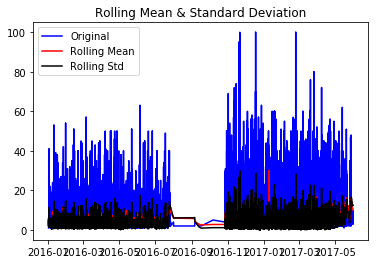

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [47]:
test_stationarity(ts)

In [43]:
import bokeh
bokeh.sampledata.download()
from bokeh.sampledata.stocks import AAPL

# prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

Creating C:\Users\luism\.bokeh directory
Creating C:\Users\luism\.bokeh\data directory
Using data directory: C:\Users\luism\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Do

In [49]:
aapl_dates

array(['2000-03-01', '2000-03-02', '2000-03-03', ..., '2013-02-27',
       '2013-02-28', '2013-03-01'], dtype='datetime64[D]')

In [53]:
aapl

array([  31.68,   29.66,   31.12, ...,  438.75,  435.62,  424.83])

In [51]:
ts_dates

array(['2016-01-01T19:00:00.000000000', '2016-01-01T19:00:00.000000000',
       '2016-01-01T19:00:00.000000000', ...,
       '2017-05-31T20:00:00.000000000', '2017-05-31T20:00:00.000000000',
       '2017-05-31T21:00:00.000000000'], dtype='datetime64[ns]')

In [52]:
ts_avg

array([ 1.66666667,  3.03333333,  3.46666667, ...,  6.76666667,
        6.6       ,  6.5       ])